In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from skimage import data, color, feature
from itertools import chain
import cv2
from matplotlib import pyplot as plt

categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

def pre_process():
  base_path = '/content/drive/MyDrive/Machine Learning Assignment/Dataset/'
  types = ['Training', 'Testing']
  x = []
  x2 = []

  for type_ in types:
    for i, catagory in enumerate(categories):
      partial_path = os.path.join(base_path, type_, catagory)
      images = os.listdir(partial_path)
      for img in images:
        full_path = os.path.join(partial_path, img)
        #img = cv2.imread(full_path)
        img2 = img_to_array(load_img(full_path, target_size=(256, 256, 1)))/255.00
        #x.append(img)
        x2.append(img2)

  return x, x2

In [ ]:
x, x2 = pre_process()

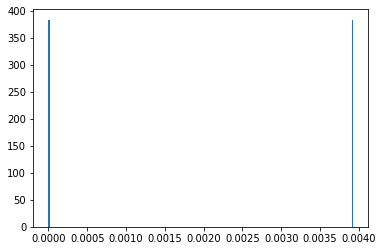

In [ ]:
x2 = np.array(x2)
ax = plt.hist((x2[0][0].ravel()), bins = 256)
plt.show()

7043


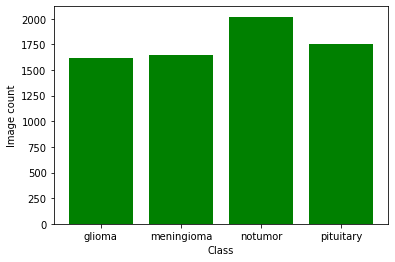

In [ ]:
def collate_and_plot():
  base_path = '/content/drive/MyDrive/Machine Learning Assignment/Dataset/'
  classSizes = {
    "glioma": 0,
    "meningioma": 0,
    "notumor": 0,
    "pituitary": 0,
  }
  types = ['Training', 'Testing']
  total = 0

  for i, catagory in enumerate(categories):
    size = 0
    for type_ in types:
      partial_path = os.path.join(base_path, type_, catagory)
      images = os.listdir(partial_path)
      size += len(images)
    classSizes[catagory] = size
    total += size

  print(total)
  plt.bar(classSizes.keys(), classSizes.values(), color='g')
  plt.xlabel("Class")
  plt.ylabel("Image count")
  plt.show()

collate_and_plot()

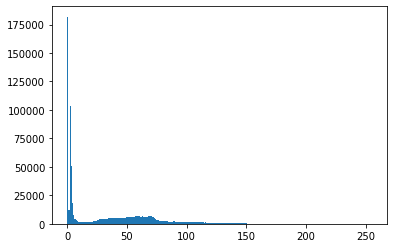

In [4]:
from skimage import io
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/glioma/Tr-gl_0011.jpg')
ax = plt.hist(image.ravel(), bins = 256)
plt.show()

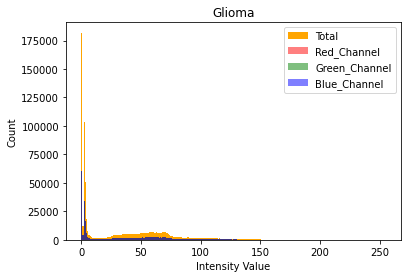

In [ ]:
#image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/meningioma/Tr-meTr_0000.jpg')

_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
_ = plt.title('Glioma')
plt.show()

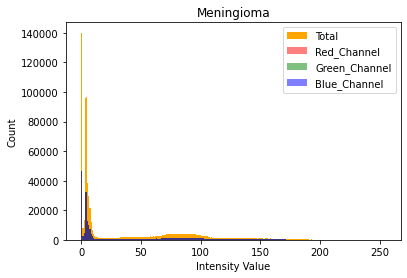

In [ ]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/meningioma/Tr-meTr_0000.jpg')
_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
_ = plt.title('Meningioma')
plt.show()

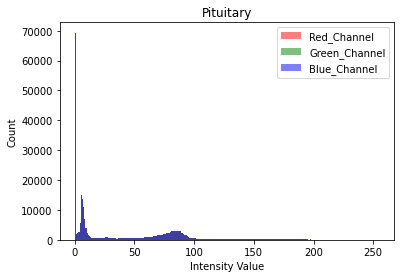

In [ ]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/pituitary/Tr-piTr_0000.jpg')
_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
_ = plt.title('Pituitary')
plt.show()

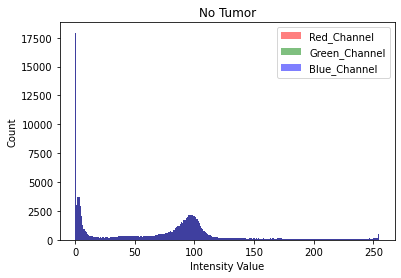

In [ ]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/notumor/Tr-noTr_0000.jpg')
#_ = plt.hist(image.ravel(), bins = 4, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
_ = plt.title('No Tumor')
plt.show()

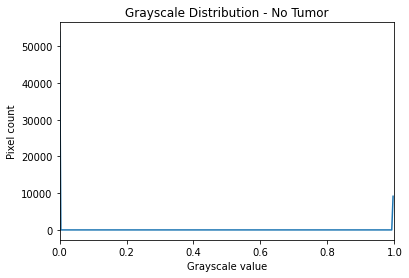

In [ ]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/notumor/Tr-noTr_0000.jpg')
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Distribution - No Tumor")
plt.xlabel("Grayscale value")
plt.ylabel("Pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

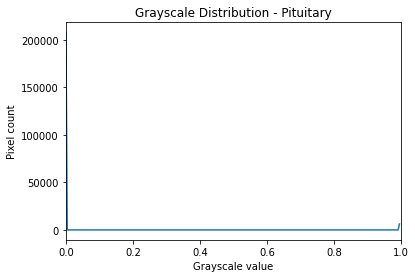

In [ ]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/pituitary/Tr-piTr_0000.jpg')

histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Distribution - Pituitary")
plt.xlabel("Grayscale value")
plt.ylabel("Pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

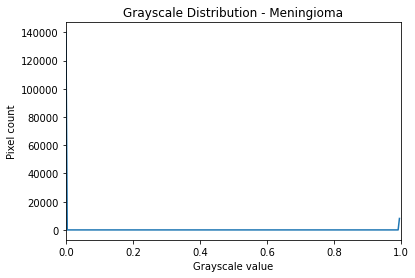

In [ ]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/meningioma/Tr-meTr_0000.jpg')

histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Distribution - Meningioma")
plt.xlabel("Grayscale value")
plt.ylabel("Pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

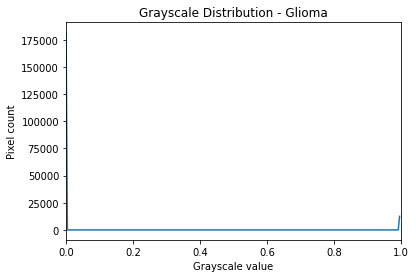

In [5]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/glioma/Tr-gl_0011.jpg')

histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Distribution - Glioma")
plt.xlabel("Grayscale value")
plt.ylabel("Pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

(-0.5, 511.5, 511.5, -0.5)

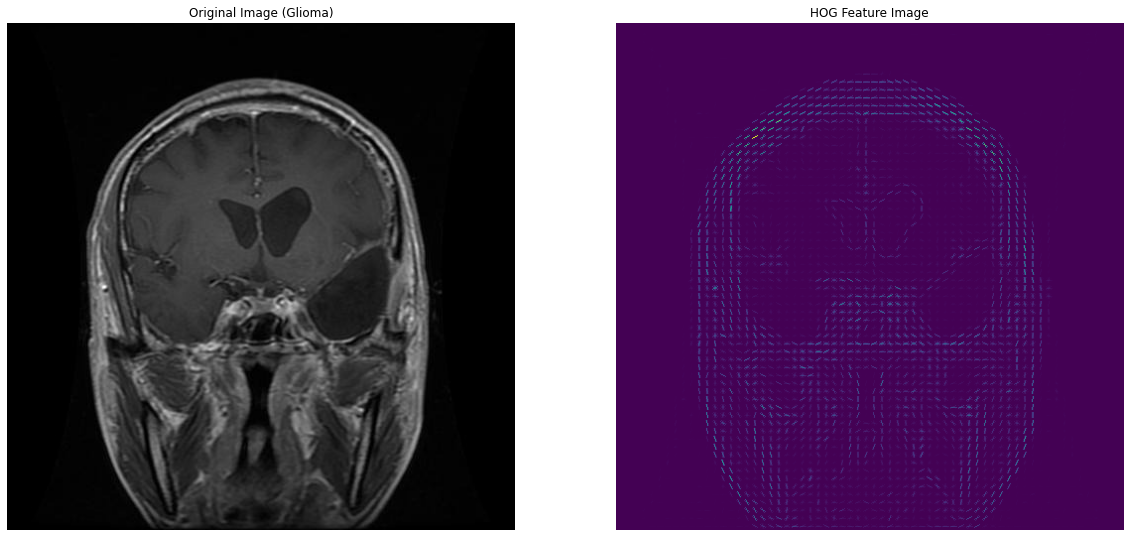

In [10]:
image = io.imread('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/glioma/Tr-gl_0011.jpg')
hog_vec, hog_vis = feature.hog(image,visualize=True)
fig,ax = plt.subplots(figsize=(20,18), ncols=2, nrows=1)
ax[0].imshow(image)
ax[0].set_title('Original Image (Glioma)')
ax[0].axis('off')
ax[1].imshow(hog_vis)
ax[1].set_title('HOG Feature Image')
ax[1].axis('off')

In [4]:
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
base_path = '/content/drive/MyDrive/Machine Learning Assignment/Dataset/'
types = ['Training', 'Testing']

training = 0
testing = 0

for c in categories:
  partial_path = os.path.join(base_path, 'Testing', c)
  images = os.listdir(partial_path)
  testing += len(images)

for c in categories:
  partial_path = os.path.join(base_path, 'Training', c)
  images = os.listdir(partial_path)
  training += len(images)


IndexError: ignored

In [12]:
print('{} training images\n{} testing images\n{} total images\n{:%} training images'.format(training, testing, training+testing, (training / (training + testing))))


5732 training images
1311 testing images
7043 total images
81.385773% training images
